In [ ]:
from IPython.display import Image

## General Machine Learning Process:CRISP DM

In [64]:
Image(url= "https://user-images.githubusercontent.com/52098725/69940953-d71a7f80-1526-11ea-9c9d-3af2880a4f36.png")

In [65]:
Image(url= "https://user-images.githubusercontent.com/52098725/69941113-0204d380-1527-11ea-8eb6-8809793f516c.png")

## Predictive Analytics Process

In [1]:
Image(url= "https://user-images.githubusercontent.com/52098725/69938203-04affa80-1520-11ea-9646-0e3ba6690f9e.png")

## Step 1: Business Understanding

### 사업 목적
- 새로운 개인연금상품 (PEP: Personal Equity 을 개발하여 기존 고객들을 대상으로 가능한 많은 계좌를 유치


### 분석 목표
- PEP 가입 예측모형 개발
- 고객 프로파일 개발
- 다이렉트 메일 광고 효율성 제고
- 타겟 메일링에 의한 응답률 제고

## Step2: Data Understanding

### 데이터 획득 절차
1) 기존고객 DB 로부터 시험메일 발송을 위한 표본고객목록을 추출<br>
2) 새로운 금융상품 (PEP)의 제안 메일을 발송<br>
3) 고객의 반응을 기록<br>


### 분석 데이터
- 학습용 데이터 600 건 M3T1_data_pepTestCustomers.csv
- 신규고객 데이터 200 건 M3T1_data_pepNewCustomers.csv

#### Frequently used libraries in Module 3 & 4

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Collect Initial Data

In [10]:
import os
os.getcwd()

'D:\\ML_CHRD'

In [11]:
# for modeling
df = pd.read_csv("./강의자료/Machine_Learning/data_pepTestCustomers.csv")
new = pd.read_csv("./강의자료/Machine_Learning/data_pepNewCustomers.csv")

#### Describe Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id             600 non-null object
age            540 non-null float64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [14]:
# replace NAN
df.age.fillna(round(df.age.mean(),0), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id             600 non-null object
age            600 non-null float64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [15]:
df.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.696667,0.500000,1.231667,27619.973883,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,13.564709,0.500417,1.286113,13187.408966,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,43.000000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,53.000000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,95435.200000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261B5CA7E88>,
      dtype=object)

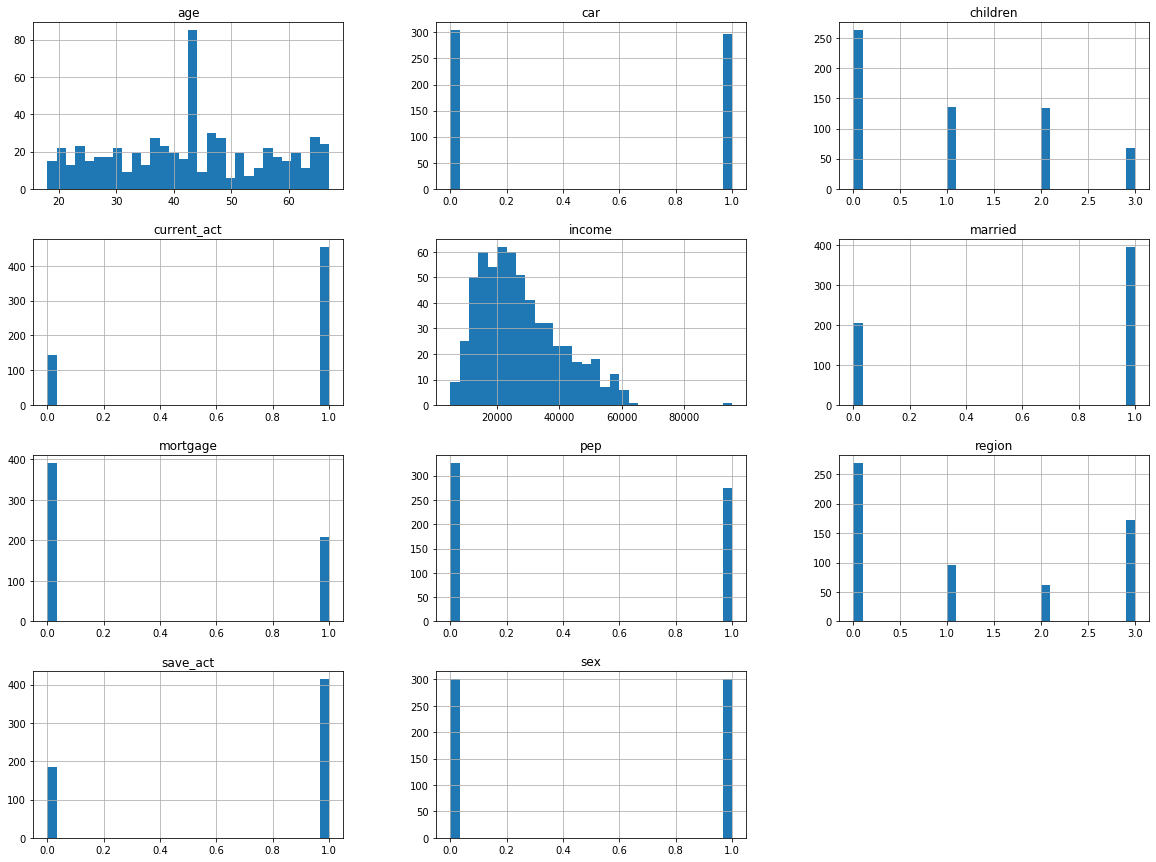

In [16]:
df.hist(bins=30, figsize=(20,15))

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text yticklabel objects>)

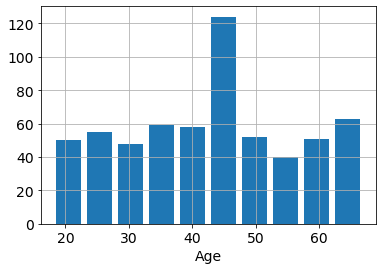

In [66]:
# plt.hist(df.age, rwidth=0.8)
# plt.grid()
# plt.xlabel('Age', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

In [17]:
print(new.shape)
new.tail()

(200, 11)


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
195,ID12896,66,1,0,58792.6,0,1,1,1,1,1
196,ID12897,19,1,0,17906.8,0,2,1,1,0,0
197,ID12898,54,1,1,29348.8,0,0,0,0,1,1
198,ID12899,42,0,3,20552.5,1,0,1,1,1,0
199,ID12900,34,1,0,25843.1,0,2,0,1,1,0


#### Explore Data Look for Correlations

In [18]:
df.corr() # pep와 다른 독립 변수가 얼마나 연관이 있나 살펴봄.

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
age,1.000000,-0.121495,0.024705,0.707379,0.016645,0.022142,0.065128,0.161015,-0.033604,-0.029837,0.183699
sex,-0.121495,1.000000,-0.035018,-0.030606,0.021110,-0.014206,0.006667,0.007207,-0.019466,0.066465,0.046843
region,0.024705,-0.035018,1.000000,0.009813,0.006188,0.011520,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.707379,-0.030606,0.009813,1.000000,-0.002977,0.042774,0.072590,0.265233,0.035036,-0.019666,0.225086
married,0.016645,0.021110,0.006188,-0.002977,1.000000,-0.048716,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
children,0.022142,-0.014206,0.011520,0.042774,-0.048716,1.000000,0.036455,0.041536,0.006238,-0.074339,-0.057663
car,0.065128,0.006667,0.021860,0.072590,-0.009571,0.036455,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act,0.161015,0.007207,0.084382,0.265233,0.028604,0.041536,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act,-0.033604,-0.019466,-0.013356,0.035036,-0.059996,0.006238,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage,-0.029837,0.066465,0.026083,-0.019666,-0.021711,-0.074339,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


In [19]:
df.corr().pep.sort_values(ascending=False)

pep            1.000000
income         0.225086
age            0.183699
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

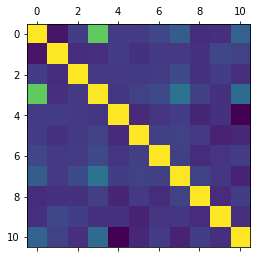

In [21]:
plt.matshow(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261B8818E88>,
      dtype=object)

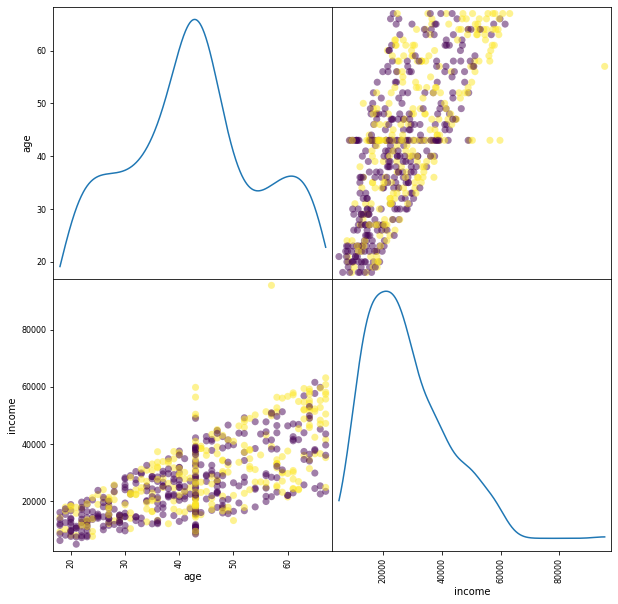

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:, [1,4]], c=df['pep'], \
               figsize=(10,10), marker='o', s=50, diagonal='kde')

#### Explore Data - Detect Outliers

age       AxesSubplot(0.125,0.536818;0.775x0.343182)
income       AxesSubplot(0.125,0.125;0.775x0.343182)
dtype: object

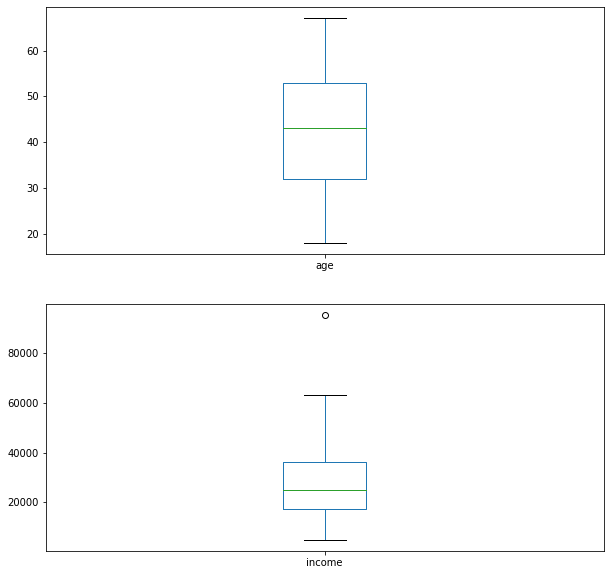

In [26]:
df.loc[:, ['age', 'income']].plot.box(subplots=True, \
                                      layout=(2,1), figsize=(10,10))

## Step 3: Data Preparation

#### Construct Data Derive Attributes

In [29]:
mdf = df.copy()
mdf['realincome'] = np.where(mdf['children']==0,\
                             mdf['income'], mdf['income']/mdf['children'])
mdf.head() # realincome이라는 항목이 생김

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1,17546.000000
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0,10028.366667
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0,16575.400000
3,ID12104,23.0,0,3,20375.4,1,3,0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,50576.3,1,0,0,1,0,0,0,50576.300000


#### Select Data Filter Attributes

In [30]:
mdf = mdf.drop(['income', 'children'], axis=1)
mdf.head()

,id,age,sex,region,married,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48.0,0,0,0,0,0,0,0,1,17546.000000
1,ID12102,40.0,1,3,1,1,0,1,1,0,10028.366667
2,ID12103,43.0,0,0,1,1,1,1,0,0,16575.400000
3,ID12104,23.0,0,3,1,0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,1,0,1,0,0,0,50576.300000


#### Split Data

In [31]:
from sklearn.model_selection import train_test_split # for Hold-out validation

In [32]:
dfX = mdf.drop(['id', 'pep'], axis=1) # exclude 'id' attribute & class variable
dfy = mdf['pep']
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, \
                                                    test_size=0.25, random_state=0)

In [34]:
print(X_train.shape, X_test.shape)

(450, 9) (150, 9)


In [36]:
X_train.head()

,age,sex,region,married,car,save_act,current_act,mortgage,realincome
46,50.0,0,0,0,1,1,1,0,13283.9
263,60.0,0,0,1,1,1,1,1,46358.4
458,18.0,1,2,0,0,1,1,0,13700.2
230,59.0,0,0,1,1,0,1,1,30189.4
107,23.0,1,0,1,0,0,1,0,13039.9


## Step 4: Modeling

#### Build Model Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [39]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [40]:
pred_tree = tree.predict(X_test);pred_tree

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

#### Assess Model

In [43]:
tree.score(X_train, y_train)

0.8422222222222222

In [44]:
tree.score(X_test, y_test)

0.6933333333333334

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_tree)

array([[66, 12],
       [34, 38]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names = ['not buy', 'buy']))

              precision    recall  f1-score   support

     not buy       0.66      0.85      0.74        78
         buy       0.76      0.53      0.62        72

    accuracy                           0.69       150
   macro avg       0.71      0.69      0.68       150
weighted avg       0.71      0.69      0.68       150



## Step5 : Evaluation

#### Which model is the best ? <br> Is the model useful ?

In [48]:
best_model = tree # Change this code if the best model is not decision tree.
best_model.score(X_test, y_test)

0.6933333333333334

In [51]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0    78
1    72
Name: pep, dtype: int64


0.52

## Step6 : Deployment

#### Preprocessing

In [53]:
# You must do the same preprocessing as the modeling data.
ndf = new.copy()
ndf['realincome'] = np.where(ndf['children']==0, \
                             ndf['income'], ndf['income']/ndf['children'])
ndf = ndf.drop(['income', 'children'], axis=1)
ndf.head()

,id,age,sex,region,married,car,save_act,current_act,mortgage,realincome
0,ID12701,23,1,0,1,1,1,0,1,18766.90
1,ID12702,30,1,1,0,0,1,0,1,9915.67
2,ID12703,45,0,1,0,1,1,1,0,21881.60
3,ID12704,50,1,3,1,0,1,0,1,23397.20
4,ID12705,41,0,0,1,1,1,1,0,20721.10


#### Case I Apply the best model to select target customers

In [55]:
ndf['pred'] = best_model.predict(ndf.loc[:, 'age':'realincome'])

In [56]:
print(best_model.predict_proba(ndf.loc[:, 'age':'realincome']))
ndf['pred_prob'] = best_model.predict_proba(ndf.loc[:, 'age':'realincome'])[:,1]

[[0.51470588 0.48529412]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.51470588 0.48529412]
 [0.53846154 0.46153846]
 [0.85714286 0.14285714]
 [0.15       0.85      ]
 [0.91304348 0.08695652]
 [0.33333333 0.66666667]
 [0.85714286 0.14285714]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.51470588 0.48529412]
 [0.7        0.3       ]
 [0.15       0.85      ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.91304348 0.08695652]
 [0.         1.        ]
 [0.85714286 0.14285714]
 [0.85106383 0.14893617]
 [0.85714286 0.14285714]
 [1.         0.        ]
 [1.         0.        ]
 [0.85106383 0.14893617]
 [0.85714286 0.14285714]
 [0.33333333 0.66666667]
 [0.91304348 0.08695652]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.5        0.5       ]
 [0.51470588 0.48529412]
 [0.         1.        ]
 [0.51470588 0.48529412]
 [0.15       0.85      ]
 [0.91304348 0.08695652]
 [1.         0.        ]


In [57]:
ndf.head()

,id,age,sex,region,married,car,save_act,current_act,mortgage,realincome,pred,pred_prob
0,ID12701,23,1,0,1,1,1,0,1,18766.90,0,0.485294
1,ID12702,30,1,1,0,0,1,0,1,9915.67,0,0.000000
2,ID12703,45,0,1,0,1,1,1,0,21881.60,1,1.000000
3,ID12704,50,1,3,1,0,1,0,1,23397.20,1,1.000000
4,ID12705,41,0,0,1,1,1,1,0,20721.10,0,0.485294


In [59]:
target = ndf.query('pred == 1 & pred_prob > 0.7') # PEP에 가입할 확률이 70%가 넘는 고객만 추출
target.sort_values(by="pred_prob", ascending=False).to_csv("pep_target_AN.csv", index=False)
pd.read_csv("pep_target_AN.csv").tail()

,id,age,sex,region,married,car,save_act,current_act,mortgage,realincome,pred,pred_prob
56,ID12738,33,1,0,1,0,1,1,1,28589.4,1,0.850000
57,ID12716,44,1,3,1,0,0,0,1,34961.7,1,0.850000
58,ID12708,50,0,0,1,1,1,0,1,27740.8,1,0.850000
59,ID12892,44,0,2,1,1,1,1,1,25353.3,1,0.850000
60,ID12897,19,1,0,0,1,1,0,0,8953.4,1,0.833333


#### Case II Export the best model for future use in other programs or systems

In [60]:
from sklearn.externals import joblib

D:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [61]:
# save the model to disk
joblib.dump(best_model, 'pep_model.sav')

['pep_model.sav']

In [62]:
# load the model from disk
loaded_model = joblib.load('pep_model.sav')
loaded_model.score(X_test, y_test)

0.6933333333333334